**Task 1**

**Answer 1**

The below code is the answer for Task 1.Explained below are the steps followed for model predictions.

1)Started with importing all required modules from different libraries loading the dataset.

2)Read the dataset using pandas dataframe. Ued head() and describe() functions to view data attaributes

3)To place the target variable - Personal Loan in the end of the dataframe, rearranged the columns

4)Used methods shape to see the number of rows and columns of dataframe used and info() to view dtype and count of all columns

5)As a part of data preprocessing, looked for missing values if any in the dataframe using isna() and found there are no missing values in dataframe

6)The dataframe has continuous data that needs to be binned which is required for Bernoulli Naive Bayes. Performed Binning to convert continuous data to bins that are "Age","Experience","Income","CCAvg","Mortgage". After binning, I encoded the binned data to binary data using One hot encoding which is required for Bernoulli Naive Bayes.

7)For Guassian Naive Bayes, I encoded categorical variable "Eduction" using one hot encoding since we need to encode categorical data for Guassian Naive Bayes

8)Checked if all data are binary to proceed with Bernoulli Naive Bayes using is_binary method

9)Visualized a heatmap to find corelation in data. Found Age and Experience have a highest correlation of almost 1.

10)Dropped irrelevant columns "ID" and "ZIP Code" from the dataframes

11)Model Training: Bernoulli Naive Bayes

a)Splitting the binned encoded data for BernoulliNB Model in split ratio of 80:20 for train:test split.

b)Assigned train_test_split for four variables X_train, X_test, y_train, y_test

c)Created an object of class Bernoulli. Fit(trained) object with training data using fit() method and  predicted test data using predit() method.

d)Evaluating model performance based on parameters - Accuracy,Classification Report and Confusion Matrix

e)Saved Bernoulli trained model using pickle

f)Saved predictions to csv file

12)Model Training: Guassian Naive Bayes

a)Splitting the encoded data in split ratio of 80:20 for train:test split.

b)Assigned train_test_split for four variables X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb

c)Created an object of class Guassian. Fit(trained) object with training data using fit() method and  predicted test data using predit() method.

d)Evaluating model performance based on parameters - Accuracy,Classification Report and Confusion Matrix

e)Saved Guassian trained model using pickle

f)Saved predictions to csv file





In [3]:
#importing drive module from google.colab package
from google.colab import drive

#mounting drive at a specific location in google colab
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
#importing os module
import os

#setting current directory path
os.chdir("/content/drive/MyDrive")

In [6]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle


In [7]:
#(1)Read and Understand the Data

#(a)Load the dataset `Bank_Personal_Loan_Modelling.csv` and display the first few rows.

#reading input csv file as pandas dataframe
bank_loan_model_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [8]:
#(b)Review the data attributes using df.head()

#Displaying first few rows of dataframe using head()
bank_loan_model_df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
#(b)Review the data attributes using df.describe()

#Displaying overview of data using describe()
bank_loan_model_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
#Rearranging target column in original dataframe
personal_loan = bank_loan_model_df['Personal Loan']
bank_loan_model_df.drop(['Personal Loan'], axis=1, inplace = True)
bank_loan_model_df['Personal Loan'] = personal_loan
bank_loan_model_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [11]:
#Displaing number of elements in each dimension using shape
bank_loan_model_df.shape

(5000, 14)

In [12]:
#Information about the data
bank_loan_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
#(2)Data Preprocessing

#(a)Handle missing values (check if any, decide how to impute using mean, median or mode)

#Checked for missing values to handle. There are no missing values in dataset
bank_loan_model_df.isna().apply(pd.value_counts).transpose()

,False
ID,5000
Age,5000
Experience,5000
Income,5000
ZIP Code,5000
Family,5000
CCAvg,5000
Education,5000
Mortgage,5000
Securities Account,5000


In [14]:
#(c)Transform variables if needed (e.g., binning to convert continous variable to categorical if needed)

#Binning to convert continous variables("Age","Experience","Income","CCAvg","Mortgage") to categorical for BernoulliNB

#Defines a list named continuous_features containing the names of continuous features in a dataset
continuous_features = ["Age","Experience","Income","CCAvg","Mortgage"]

#Define a custom transformation function to convert dtype to int
#def to_int(x):
 #   return x.astype(int)

#Create a FunctionTransformer to apply the to_int function to the data
#transformer = FunctionTransformer(to_int, validate=False)

#Create an instance of KBinsDiscretizer giving number of bins as 5
bin_val = KBinsDiscretizer(n_bins=5,encode="ordinal",strategy="uniform")

#Creating a copy of original dataframe
bin_data = bank_loan_model_df.copy()

#Fit and transform the data
bin_data[continuous_features] = bin_val.fit_transform(bin_data[continuous_features])

#Keeping dtype of Age as int
bin_data["Age"] = bin_data["Age"].astype(int)

#Saving binned dataset in a new csv file
bin_data.to_csv("binned_dataset.csv",index = False)

#Reading binned csv data
bin_df = pd.read_csv("binned_dataset.csv")

#Displaying few rows from binned dataframe
bin_df.head()

#Displaying information of binned dataframe
#bin_df.info()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,0,0.0,0.0,91107,4,0.0,1,0.0,1,0,0,0,0
1,2,2,2.0,0.0,90089,3,0.0,1,0.0,1,0,0,0,0
2,3,1,1.0,0.0,94720,1,0.0,1,0.0,0,0,0,0,0
3,4,1,1.0,2.0,94112,1,1.0,2,0.0,0,0,0,0,0
4,5,1,1.0,0.0,91330,4,0.0,2,0.0,0,0,0,1,0


In [16]:
#(b)Encode categorical variables for Bernoulli Naive Bayes(check if needed and use one hot encoding)

#Coverting categorical variables into Boolean variables (1/0s) using one hot encoding needed for Bernoulli Naive Bayes

#Creating a copy of original dataframe
enc_df = bin_df.copy()

#Listing continuous features
cont_features = ["Age","Experience","Income","CCAvg","Mortgage","Education","Family","Securities Account","CD Account","Online","CreditCard"]

#Creating a new DataFrame containing only the columns representing continuous features
cat_data = enc_df[cont_features]

#Initializing an instance of OneHotEncoder with parameters set to automatically determine categories, not drop any categories, and return the output in dense array format.
#This encoder can then be used to transform categorical features into a one-hot encoded representation.
enc = OneHotEncoder(categories="auto",drop=None,sparse=False)

#Using the fit_transform method of the OneHotEncoder object enc to transform below columns of the DataFrame bank_loan_model_df into a one-hot encoded representation
enc_data = enc.fit_transform(cat_data)

#Creating a DataFrame enc_df from the transformed data enc_data obtained after applying one-hot encoding
encoded_df = pd.DataFrame(enc_data,columns=enc.get_feature_names_out(cont_features))

#Concatenating the original DataFrame bank_loan_model_df with the DataFrame enc_df containing the one-hot encoded feature
df_enc = pd.concat([enc_df.drop(columns=cont_features),encoded_df], axis=1)
#df_enc["Age"] = df_enc["Age"].astype(int)

df_enc.head()
#df_enc.info()

#Rearranging target column in encoded dataframe
personal_loan = df_enc['Personal Loan']
df_enc.drop(['Personal Loan'], axis=1, inplace = True)
df_enc['Personal Loan'] = personal_loan
df_enc.head(5)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ID,ZIP Code,Age_0,Age_1,Age_2,Age_3,Age_4,Experience_0.0,Experience_1.0,Experience_2.0,...,Family_4,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,Personal Loan
0,1,91107,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,2,90089,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,3,94720,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,4,94112,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,5,91330,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0


In [17]:
#(b)Encode categorical variables for Guassian Naive Bayes(check if needed and use one hot encoding)

#GaussianNB can handle both Boolean variables and continuous variables.There is no need to bin the continuous variables, However, there is a need to convert categorical variables("Education") through onehot enocoding.

#Creating a copy of original dataframe
enc_df_gnb = bank_loan_model_df.copy()

#Listing continuous features
cat_features_gnb = ["Education"]

#Creating a new DataFrame containing only the columns representing continuous features
cat_data_gnb = enc_df_gnb[cat_features_gnb]

#Initializing an instance of OneHotEncoder with parameters set to automatically determine categories, not drop any categories, and return the output in dense array format.
#This encoder can then be used to transform categorical features into a one-hot encoded representation.
enc_gnb = OneHotEncoder(categories="auto",drop=None,sparse=False)

#Using the fit_transform method of the OneHotEncoder object enc_gnb to transform below columns of the DataFrame bank_loan_model_df into a one-hot encoded representation
enc_data_gnb = enc_gnb.fit_transform(cat_data_gnb)

#Creating a DataFrame enc_df_gnb from the transformed data enc_data_gnb obtained after applying one-hot encoding
encoded_df_gnb = pd.DataFrame(enc_data_gnb,columns=enc_gnb.get_feature_names_out(cat_features_gnb))

#Concatenating the original DataFrame bank_loan_model_df with the DataFrame enc_df_gnb containing the one-hot encoded feature
df_enc_gnb = pd.concat([enc_df_gnb.drop(columns=cat_features_gnb),encoded_df_gnb], axis=1)
#df_enc_gnb["Age"] = df_enc_gnb["Age"].astype(int)

df_enc_gnb.head()
#df_enc_gnb.info()

#Rearranging target column in encoded dataframe
personal_loan = df_enc_gnb['Personal Loan']
df_enc_gnb.drop(['Personal Loan'], axis=1, inplace = True)
df_enc_gnb['Personal Loan'] = personal_loan

#Dropping unnecessary columns ID and Zipcode
df_enc_gnb = df_enc_gnb.drop(["ID", "ZIP Code"], axis=1)
df_enc_gnb.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Personal Loan
0,25,1,49,4,1.6,0,1,0,0,0,1.0,0.0,0.0,0
1,45,19,34,3,1.5,0,1,0,0,0,1.0,0.0,0.0,0
2,39,15,11,1,1.0,0,0,0,0,0,1.0,0.0,0.0,0
3,35,9,100,1,2.7,0,0,0,0,0,0.0,1.0,0.0,0
4,35,8,45,4,1.0,0,0,0,0,1,0.0,1.0,0.0,0


In [18]:
#Checking encoded values for Bernoulli Naive Bayes is binary or not

is_binary = df_enc.apply(lambda x: x.isin([0,1]).all())
print(is_binary)

ID                      False
ZIP Code                False
Age_0                    True
Age_1                    True
Age_2                    True
Age_3                    True
Age_4                    True
Experience_0.0           True
Experience_1.0           True
Experience_2.0           True
Experience_3.0           True
Experience_4.0           True
Income_0.0               True
Income_1.0               True
Income_2.0               True
Income_3.0               True
Income_4.0               True
CCAvg_0.0                True
CCAvg_1.0                True
CCAvg_2.0                True
CCAvg_3.0                True
CCAvg_4.0                True
Mortgage_0.0             True
Mortgage_1.0             True
Mortgage_2.0             True
Mortgage_3.0             True
Mortgage_4.0             True
Education_1              True
Education_2              True
Education_3              True
Family_1                 True
Family_2                 True
Family_3                 True
Family_4  

<Axes: title={'center': 'Correlation of attributes'}>

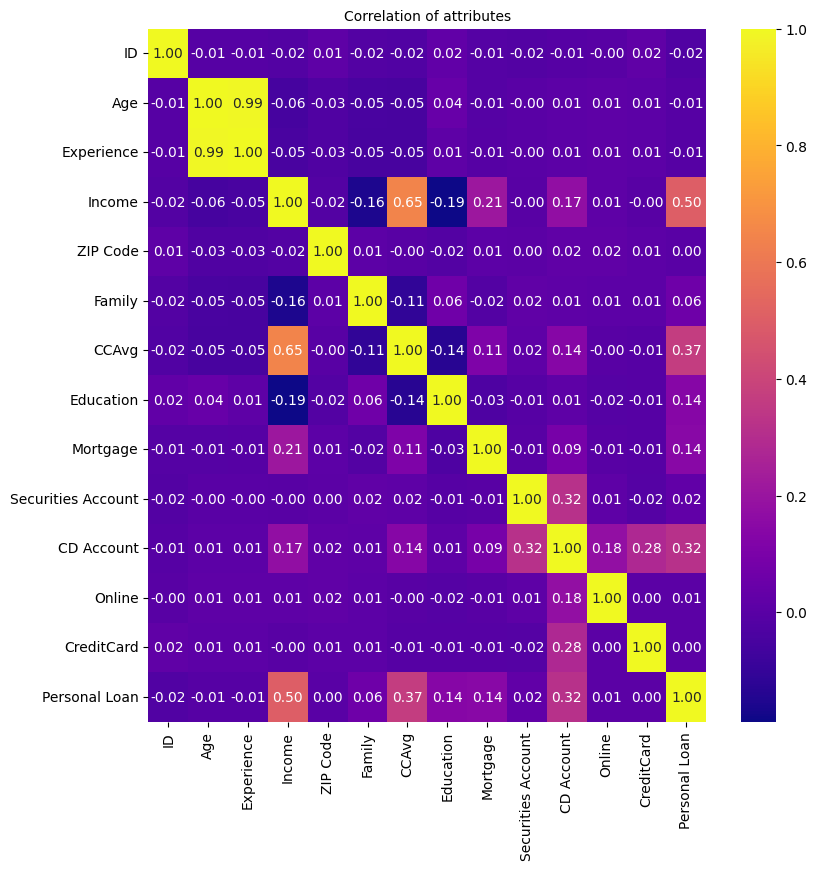

In [19]:
#Visualizing using heatmap to find corelation in data

#creating a new Matplotlib figure with a size of 9 inches by 9 inches
plt.figure(figsize = (9,9))

#Adding a title to the current plot with the specified text, positioned at the top of the plot, and with a font size of 10 points
plt.title("Correlation of attributes",y=1,size=10)

#Generating a heatmap plot visualizing the correlation matrix of the DataFrame
sns.heatmap(bank_loan_model_df.corr(), cmap = "plasma", annot=True, fmt=".2f")

In [20]:
#Dropping columns ID and Zipcode since they are irrelevant in building models
bank_loan_model_df = bank_loan_model_df.drop(["ID", "ZIP Code"], axis=1)
df_enc = df_enc.drop(["ID", "ZIP Code"], axis=1)
#Displaying first few rows
bank_loan_model_df.head()
df_enc.head()
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age_0                 5000 non-null   float64
 1   Age_1                 5000 non-null   float64
 2   Age_2                 5000 non-null   float64
 3   Age_3                 5000 non-null   float64
 4   Age_4                 5000 non-null   float64
 5   Experience_0.0        5000 non-null   float64
 6   Experience_1.0        5000 non-null   float64
 7   Experience_2.0        5000 non-null   float64
 8   Experience_3.0        5000 non-null   float64
 9   Experience_4.0        5000 non-null   float64
 10  Income_0.0            5000 non-null   float64
 11  Income_1.0            5000 non-null   float64
 12  Income_2.0            5000 non-null   float64
 13  Income_3.0            5000 non-null   float64
 14  Income_4.0            5000 non-null   float64
 15  CCAvg_0.0            

In [21]:
#(3) BernoulliNB Model Training

#Seperating the data(binned and encoded) for BernoulliNB modelling  into dependent and independent variables
X = df_enc.iloc[:, :-1].values
y = df_enc.iloc[:, -1].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [22]:
#(b) Decide what model parameters you will be using for BernoulliNB

# Chosen Parameters are alpha,binarize,fit_prior,class_prior
# alpha=1.0: This is a standard choice for smoothing to handle cases where some feature probabilities might be zero.
# binarize=None: Assuming your features are already binary, there's no need to binarize them.
# fit_prior=True: Allows the model to learn class prior probabilities from the data, which is usually beneficial.
# class_prior=None: Lets the model determine the class priors from the training data, which is typically preferred unless you have prior knowledge.

In [23]:
#(a1) Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

#Creating an object classifier of class BernoulliNB passing parameters alpha,binarize,fit_prior,class_prior to model
classifier = BernoulliNB(alpha=1.0, binarize=None, fit_prior=True, class_prior=None)

#(c) Train a Naive Bayes model using the data set
classifier.fit(X_train, y_train)

#Predicting testing set
y_pred = classifier.predict(X_test)

#(4c)Report the model accuracy, confusion matrix, and classification report for each of the two model types used

#Evaluation of model based on different parameters
accuracy_bnb = accuracy_score(y_pred,y_test)
confusion_matrix_bnb = confusion_matrix(y_test, y_pred)
classification_report_bnb = classification_report(y_test, y_pred)

#Summary of the predictions made by the classifier
print(f"Accuracy: {accuracy_bnb}")
print(f"Confusion Matrix:\n{confusion_matrix_bnb}")
print(f"Classification Report:\n{classification_report_bnb}")

#(d) Save the trained model using pickle

#Save trained BernoulliNB model
with open('/content/drive/MyDrive/bernoulli_nb_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

#(4) Model Prediction and Evaluation

#(a) Make predictions on the data set in a new column named 'pred_personal_loan'

#Adding predictions to the dataset
df_enc['pred_personal_loan_bnb'] = classifier.predict(X)

#(4b) Save the predictions to a CSV file

df_enc.to_csv('/content/drive/MyDrive/Bank_Personal_Loan_Predictions.csv', index=False)

Accuracy: 0.935
Confusion Matrix:
[[874  36]
 [ 29  61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       910
           1       0.63      0.68      0.65        90

    accuracy                           0.94      1000
   macro avg       0.80      0.82      0.81      1000
weighted avg       0.94      0.94      0.94      1000



In [24]:
#(3) Guassian Model Training

#Seperating the data(encoded) for GuassianNB modelling into dependent and independent variables
X_gnb = df_enc_gnb.iloc[:, :-1].values
y_gnb = df_enc_gnb.iloc[:, -1].values

#Splitting the dataset into the Training set and Test set
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X_gnb, y_gnb, test_size = 0.2, random_state = 0)


In [25]:
#(b) Decide what model parameters you will be using for GaussianNB

# priors=None: This allows the model to learn the class prior probabilities from the training data, which is typically beneficial when there is specific prior knowledge about the class distribution.
# var_smoothing=1e-9: The default value helps ensure numerical stability.

In [26]:
#(a2) Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Creating object classifier_gnb of class GaussianNB
classifier_gnb = GaussianNB(priors=None, var_smoothing=1e-9)

#(c) Train a GaussianNB model using the data set
classifier_gnb.fit(X_train_gnb, y_train_gnb)

#Prediticting testing set
y_pred_gnb = classifier_gnb.predict(X_test_gnb)

#(d) Save the trained model using pickle

#Save trained Gaussian Naive Bayes model
with open('/content/drive/MyDrive/gaussian_nb_model.pkl', 'wb') as file:
    pickle.dump(classifier_gnb, file)


#(4) Model Prediction and Evaluation

#(a) Make predictions on the data set in a new column named 'pred_personal_loan'

#Adding predictions to the data set
df_enc_gnb['pred_personal_loan_gnb'] = classifier_gnb.predict(X_gnb)

#(4c)Report the model accuracy, confusion matrix, and classification report for each of the two model types used

#Evaluation of model based on different parameters
accuracy_gnb = accuracy_score(y_pred_gnb,y_test_gnb)
confusion_matrix_gnb = confusion_matrix(y_test_gnb,y_pred_gnb)
classification_report_gnb = classification_report(y_test_gnb,y_pred_gnb)

#Summary of the predictions made by the classifier
print(f"Accuracy: {accuracy_gnb}")
print(f"Confusion Matrix:\n{confusion_matrix_gnb}")
print(f"Classification Report:\n{classification_report_gnb}")

#(4b) Save the predictions to a CSV file
df_enc_gnb.to_csv('/content/drive/MyDrive/Bank_Personal_Loan_Predictions_Gnb.csv', index=False)

Accuracy: 0.902
Confusion Matrix:
[[847  63]
 [ 35  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       910
           1       0.47      0.61      0.53        90

    accuracy                           0.90      1000
   macro avg       0.71      0.77      0.74      1000
weighted avg       0.92      0.90      0.91      1000



**Task 2**

In [27]:
#(1a) Model Accuracy - Which of your two models was more accurate and why? Explain accuracy score.

# Bernoulli Naive Bayes has a higher accuracy (93.5%) compared to Gaussian Naive Bayes (90.2%).

# Class 0 (No Loan): Both models perform well, but Bernoulli Naive Bayes slightly outperforms Gaussian Naive Bayes.
# Bernoulli: Precision 0.97, Recall 0.96, F1-score 0.96
# Gaussian: Precision 0.96, Recall 0.93, F1-score 0.95
# Class 1 (Loan): Bernoulli Naive Bayes performs significantly better.
# Bernoulli: Precision 0.63, Recall 0.68, F1-score 0.65
# Gaussian: Precision 0.47, Recall 0.61, F1-score 0.53

# Macro and Weighted Averages:

# Bernoulli Naive Bayes:
# Macro average F1-score: 0.81
# Weighted average F1-score: 0.94
# Gaussian Naive Bayes:
# Macro average F1-score: 0.74
# Weighted average F1-score: 0.91

# Accuracy is a measure of the proportion of correctly predicted instances out of the total instances. It is calculated as: Accuracy=Number of correct predictions/Total number of predictions
# Bernoulli Naive Bayes is more accurate and generally performs better than Gaussian Naive Bayes for this dataset, especially for the minority class (Class 1 - Loan).
# The higher accuracy and better performance metrics indicate that Bernoulli Naive Bayes is a more suitable model for this specific problem.

In [28]:
#(2a) Model Interpretation - Does the chosen model make sense? What patterns does the model reveal? Discuss the rationale behind the model's predictions

# Does the chosen model make sense?
# Yes, the chosen Bernoulli Naive Bayes model makes sense given the nature of the data. This model is particularly well-suited for binary/boolean features,
# which align with many of the attributes in the dataset (e.g., Securities Account, CD Account, Online, CreditCard). These features naturally fit the assumptions of the Bernoulli
# Naive Bayes model, leading to better performance compared to Gaussian Naive Bayes.

# Patterns Revealed by the Model
# Presence of Binary Features:
# The model works well with binary features indicating the presence or absence of certain characteristics (e.g., having a securities account or a credit card). These binary indicators help the model distinguish between potential loan applicants effectively.
# Feature Contributions:
# Features such as Income, CCAvg (average credit card spending), and Education level likely play significant roles in the model's predictions. Higher income and credit card spending may be positively correlated with loan approval, while higher education levels might indicate better financial literacy and stability, thus affecting loan approval positively.
# Age and Experience:
# Years of experience might also influence the model's predictions. For instance, more years of experience could indicate job stability, thus affecting loan approval.Through the heatmap, we can see that Age and Exprience are correlated

#rationale behind the model's predictions
# Probability Calculation:
# The Bernoulli Naive Bayes model calculates the probability of an applicant being approved for a loan by looking at the presence or absence of certain features. Each feature contributes to the overall probability, and the model makes a prediction based on the likelihood of each class (loan approved or not).
# Feature Weights:
# Each feature's presence or absence affects the posterior probability of the class. For instance, having a securities account or a higher credit card spending (CCAvg) might increase the probability of being approved for a loan.


In [43]:
#(2b) Model Interpretation - Try to illustrate what your model would predict, using those two data points

new_data = pd.DataFrame([{'ID': 1000001,'Age': 22,'Experience': 0,'Income': 20,'ZIP Code': 91107,'Family': 2,'CCAvg': 0.5,'Education': 1,'Mortgage': 0,'Securities Account': 0,'CD Account': 0,'Online': 1,'CreditCard': 1},
{'ID': 1000002,'Age': 44,'Experience': 20,'Income': 80,'ZIP Code': 90089,'Family': 4,'CCAvg': 5.6,'Education': 3,'Mortgage': 1,'Securities Account': 1,'CD Account': 1,'Online': 0,'CreditCard': 1}
])

#Data preprocessing for new_data
new_data.head()
new_data.describe()
new_data.isna().apply(pd.value_counts).transpose()


,False
ID,2
Age,2
Experience,2
Income,2
ZIP Code,2
Family,2
CCAvg,2
Education,2
Mortgage,2
Securities Account,2


In [30]:
#Binning values for Bernoulli Naive Bayes for new data
continuous_features = ["Age","Experience","Income","CCAvg","Mortgage"]
bin_new_val = KBinsDiscretizer(n_bins=5,encode="ordinal",strategy="uniform")

#Creating a copy of original dataframe
bin_new_data = new_data.copy()

#Fit and transform the data
bin_new_data[continuous_features] = bin_new_val.fit_transform(bin_new_data[continuous_features])

#Keeping dtype of Age as int
bin_new_data["Age"] = bin_new_data["Age"].astype(int)

#Saving binned dataset in a new csv file
bin_new_data.to_csv("binned_new_dataset.csv",index = False)

#Reading binned csv data
bin_new_data_df = pd.read_csv("binned_new_dataset.csv")

#Displaying few rows from binned dataframe
bin_new_data_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1000001,0,0.0,0.0,91107,2,0.0,1,0.0,0,0,1,1
1,1000002,4,4.0,4.0,90089,4,4.0,3,4.0,1,1,0,1


In [31]:
#(b)Encode categorical variables for Bernoulli Naive Bayes for new data(check if needed and use one hot encoding)

#Creating a copy of original dataframe
enc_df_new_data = bin_new_data_df.copy()

#Listing continuous features
cont_features = ["Age","Experience","Income","CCAvg","Mortgage","Education","Family","Securities Account","CD Account","Online","CreditCard"]

#Creating a new DataFrame containing only the columns representing continuous features
cat_data_new = enc_df_new_data[cont_features]

#Initializing an instance of OneHotEncoder with parameters set to automatically determine categories, not drop any categories, and return the output in dense array format.
#This encoder can then be used to transform categorical features into a one-hot encoded representation.
enc_new = OneHotEncoder(categories="auto",drop=None,sparse=False)

#Using the fit_transform method of the OneHotEncoder object enc to transform below columns of the DataFrame bank_loan_model_df into a one-hot encoded representation
enc_data_new = enc_new.fit_transform(cat_data_new)

#Creating a DataFrame enc_df_new_data from the transformed data enc_data_new obtained after applying one-hot encoding
encoded_df_new = pd.DataFrame(enc_data_new,columns=enc_new.get_feature_names_out(cont_features))

#Concatenating the original DataFrame bank_loan_model_df with the DataFrame enc_df containing the one-hot encoded feature
df_enc_new = pd.concat([enc_df_new_data.drop(columns=cont_features),encoded_df_new], axis=1)
#df_enc_new["Age"] = df_enc_new["Age"].astype(int)

df_enc_new.head()
# df_enc_new.info()

# is_binary = df_enc_new.apply(lambda x: x.isin([0,1]).all())
# print(is_binary)
df_enc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2 non-null      int64  
 1   ZIP Code              2 non-null      int64  
 2   Age_0                 2 non-null      float64
 3   Age_4                 2 non-null      float64
 4   Experience_0.0        2 non-null      float64
 5   Experience_4.0        2 non-null      float64
 6   Income_0.0            2 non-null      float64
 7   Income_4.0            2 non-null      float64
 8   CCAvg_0.0             2 non-null      float64
 9   CCAvg_4.0             2 non-null      float64
 10  Mortgage_0.0          2 non-null      float64
 11  Mortgage_4.0          2 non-null      float64
 12  Education_1           2 non-null      float64
 13  Education_3           2 non-null      float64
 14  Family_2              2 non-null      float64
 15  Family_4              2 non

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
#(b)Encode categorical variables for Guassian Naive Bayes for new data(check if needed and use one hot encoding)

#Creating a copy of original dataframe
enc_df_gnb_new = bank_loan_model_df.copy()

#Listing continuous features
cat_features_gnb_new = ["Education"]

#Creating a new DataFrame containing only the columns representing continuous features
cat_data_gnb_new = enc_df_gnb_new[cat_features_gnb_new]

#Initializing an instance of OneHotEncoder with parameters set to automatically determine categories, not drop any categories, and return the output in dense array format.
#This encoder can then be used to transform categorical features into a one-hot encoded representation.
enc_gnb_new = OneHotEncoder(categories="auto",drop=None,sparse=False)

#Using the fit_transform method of the OneHotEncoder object enc_gnb_new to transform below columns of the DataFrame bank_loan_model_df into a one-hot encoded representation
enc_data_gnb_new = enc_gnb_new.fit_transform(cat_data_gnb_new)

#Creating a DataFrame enc_df_gnb from the transformed data enc_data_gnb_new obtained after applying one-hot encoding
encoded_df_gnb_new = pd.DataFrame(enc_data_gnb_new,columns=enc_gnb_new.get_feature_names_out(cat_features_gnb))

#Concatenating the original DataFrame bank_loan_model_df with the DataFrame enc_df_gnb containing the one-hot encoded feature
df_enc_gnb_new = pd.concat([enc_df_gnb.drop(columns=cat_features_gnb),encoded_df_gnb_new], axis=1)
#df_enc_gnb_new["Age"] = df_enc_gnb_new["Age"].astype(int)

df_enc_gnb_new.head()
#df_enc_gnb_new.info()

#Rearranging target column in encoded dataframe
personal_loan = df_enc_gnb_new['Personal Loan']
df_enc_gnb_new.drop(['Personal Loan'], axis=1, inplace = True)
df_enc_gnb_new['Personal Loan'] = personal_loan

# #Dropping unnecessary columns ID and Zipcode
# df_enc_gnb_new = df_enc_gnb_new.drop(["ID", "ZIP Code"], axis=1)
# df_enc_gnb_new.head(5)

df_enc_gnb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Mortgage            5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  Education_1         5000 non-null   float64
 13  Education_2         5000 non-null   float64
 14  Education_3         5000 non-null   float64
 15  Personal Loan       5000 non-null   int64  
dtypes: flo

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
# Dropping irrelevent columns ID and ZIP Code
df_enc_new = df_enc_new.drop(["ID", "ZIP Code"], axis=1)

In [35]:
# Drop the 'Personal Loan' and 'Online_1' columns from the dataframe `df_enc`
training_columns = df_enc.drop(columns=['Personal Loan','Online_1']).columns

# Print the number of training columns and their names
print(f"Training columns ({len(training_columns)}): {list(training_columns)}")

Training columns (40): ['Age_0', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Experience_0.0', 'Experience_1.0', 'Experience_2.0', 'Experience_3.0', 'Experience_4.0', 'Income_0.0', 'Income_1.0', 'Income_2.0', 'Income_3.0', 'Income_4.0', 'CCAvg_0.0', 'CCAvg_1.0', 'CCAvg_2.0', 'CCAvg_3.0', 'CCAvg_4.0', 'Mortgage_0.0', 'Mortgage_1.0', 'Mortgage_2.0', 'Mortgage_3.0', 'Mortgage_4.0', 'Education_1', 'Education_2', 'Education_3', 'Family_1', 'Family_2', 'Family_3', 'Family_4', 'Securities Account_0', 'Securities Account_1', 'CD Account_0', 'CD Account_1', 'Online_0', 'CreditCard_0', 'CreditCard_1', 'pred_personal_loan_bnb']


In [36]:
# Predicting output for new data points using BernoulliNB

# Reorder and add missing columns in df_enc_new
for col in training_columns:
    if col not in df_enc_new.columns:
        df_enc_new[col] = 0  # or an appropriate default value

# Reorder columns to match the training data
df_enc_new = df_enc_new[training_columns]
X_new = df_enc_new.values

# Use the trained classifier to make predictions on new data
y_pred_new = classifier.predict(X_new)

# Print the predictions for the new data
print("Predictions for the new grad and the seasoned professional using Bernoulli Naive Bayes:", y_pred_new)

Predictions for the new grad and the seasoned professional using Bernoulli Naive Bayes: [0 1]


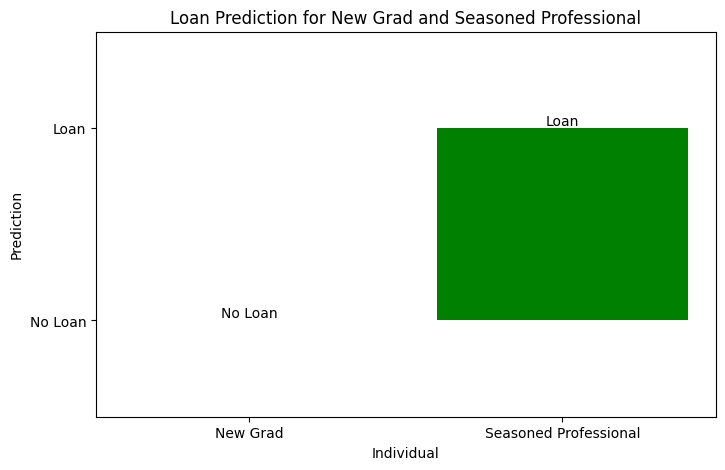

In [37]:
#(c) Consider using visualization (code is allowed) to convey your findings intuitively

#Visualization

# Define labels for the two data points
labels = ['New Grad', 'Seasoned Professional']

# Define the possible predictions
predictions = ['No Loan', 'Loan']  # Assuming binary classification where 0 = No Loan, 1 = Loan

# Convert the numerical predictions to human-readable labels
predicted_labels = [predictions[pred] for pred in y_pred_new]

# Create a new figure for the bar plot with a specified size
plt.figure(figsize=(8, 5))

# Plot the predictions as a bar plot
plt.bar(labels, y_pred_new, color=['blue', 'green'])

# Set the label for the x-axis
plt.xlabel('Individual')

# Set the label for the y-axis
plt.ylabel('Prediction')

# Set the title of the plot
plt.title('Loan Prediction for New Grad and Seasoned Professional')

# Customize the x-ticks to display the labels for each individual
plt.xticks(ticks=range(len(labels)), labels=labels)

# Set the limits for the y-axis to clearly show binary outcomes
plt.ylim(-0.5, 1.5)  # Adjust y-axis to clearly show binary outcomes


# Customize the y-ticks to display the human-readable predictions
plt.yticks(ticks=[0, 1], labels=predictions)

# Add text annotations to the bars to show the prediction labels
for i in range(len(labels)):
    plt.text(i, y_pred_new[i], predicted_labels[i], ha='center', va='bottom')

# Display the plot
plt.show()

In [38]:
df_enc_new_gnb = df_enc_new.copy()

In [39]:
# Define the training columns by dropping 'Personal Loan', 'ID', and 'Age' from the new encoded DataFrame
training_columns_gnb = df_enc_gnb_new.drop(columns=['Personal Loan','ID','Age']).columns

# Print the number of training columns and their names
print(f"Training columns ({len(training_columns_gnb)}): {list(training_columns_gnb)}")


Training columns (13): ['Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3']


In [40]:
# Predicting output for new data points using GuassianNB

#  Iterate through each column in the selected training columns for Gaussian Naive Bayes (GNB)
for col in training_columns_gnb:
    if col not in df_enc_new_gnb.columns:
        df_enc_new_gnb[col] = 0  # or an appropriate default value

# Reorder the columns in the new encoded DataFrame to match the selected training columns
df_enc_new_gnb = df_enc_new_gnb[training_columns_gnb]

# Convert the DataFrame to a NumPy array to prepare the input data for prediction
X_new_gnb = df_enc_new_gnb.values

# Use the pre-trained Gaussian Naive Bayes classifier to make predictions on the new data
y_pred_new_gnb = classifier_gnb.predict(X_new_gnb)

# Print the predictions for the new data points

print("Predictions for the new grad and the seasoned professional using Guassian Naive Bayes:", y_pred_new_gnb)

Predictions for the new grad and the seasoned professional using Guassian Naive Bayes: [0 0]


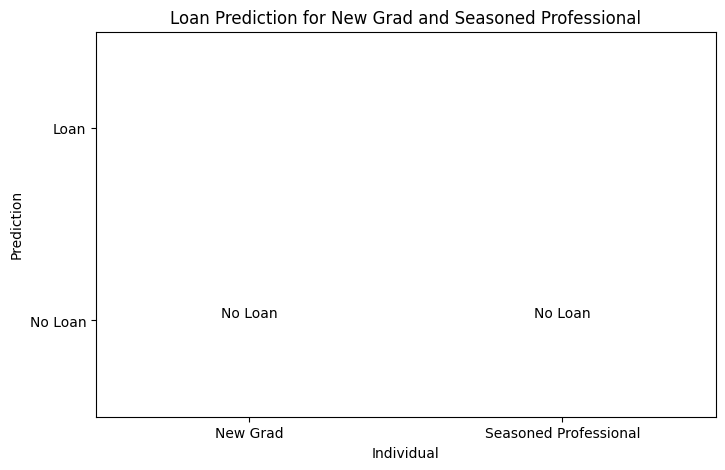

In [41]:
#(c) Consider using visualization (code is allowed) to convey your findings intuitively

# Define labels for the two individuals
labels = ['New Grad', 'Seasoned Professional']

# Define the possible predictions in human-readable form
predictions = ['No Loan', 'Loan']  # Assuming binary classification where 0 = No Loan, 1 = Loan

# Convert the numerical predictions to human-readable labels
predicted_labels = [predictions[pred] for pred in y_pred_new_gnb]

# Create a new figure for the bar plot with a specified size
plt.figure(figsize=(8, 5))

# Plot the predictions as a bar plot
plt.bar(labels, y_pred_new_gnb, color=['blue', 'green'])

# Set the label for the x-axis
plt.xlabel('Individual')

# Set the label for the y-axis
plt.ylabel('Prediction')

# Set the title of the plot
plt.title('Loan Prediction for New Grad and Seasoned Professional')

# Customize the x-ticks to display the labels for each individual
plt.xticks(ticks=range(len(labels)), labels=labels)

# Set the limits for the y-axis to clearly show binary outcomes
plt.ylim(-0.5, 1.5)  # Adjust y-axis to clearly show binary outcomes

# Customize the y-ticks to display the human-readable predictions
plt.yticks(ticks=[0, 1], labels=predictions)

# Add text annotations to the bars to show the prediction labels
for i in range(len(labels)):
    plt.text(i, y_pred_new_gnb[i], predicted_labels[i], ha='center', va='bottom')

# Display the plot
plt.show()

In [1]:
# Deliverables

#(a) Asserts your findings clearly:

# Based on the predictions obtained:
# For Bernoulli Naive Bayes (BNB), the model predicted 'No Loan' (0) for the first data point (new grad) and 'Loan' (1) for the second data point (seasoned professional).
# For Gaussian Naive Bayes (GNB), the model predicted 'No Loan' (0) for both the first and second data points.
# This suggests that the Bernoulli Naive Bayes model predicts different outcomes for the two individuals, while the Gaussian Naive Bayes model predicts the same outcome (no loan) for both individuals.
# The Bernoulli Naive Bayes model seems to provide more nuanced predictions, aligning with the intuitive understanding of loan behavior based on the provided data.
# In contrast, the Gaussian Naive Bayes model predicts no loan for both individuals, potentially indicating a more cautious approach in capturing the underlying patterns in the data



#(b) Provides quantitative evidence or reasoning to support your claims.

# Quantitative evidence supporting the claims can be derived from the accuracy of the models and the characteristics of the data points.

# Bernoulli Naive Bayes Model:

# Accuracy: 0.935
# Confusion Matrix:
# [[874  36]
#  [ 29  61]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.97      0.96      0.96       910
#            1       0.63      0.68      0.65        90

#     accuracy                           0.94      1000
#    macro avg       0.80      0.82      0.81      1000
# weighted avg       0.94      0.94      0.94      1000

# Guassian Naive Bayes Model:

# Accuracy: 0.902
# Confusion Matrix:
# [[847  63]
#  [ 35  55]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.96      0.93      0.95       910
#            1       0.47      0.61      0.53        90

#     accuracy                           0.90      1000
#    macro avg       0.71      0.77      0.74      1000
# weighted avg       0.92      0.90      0.91      1000

# Based on these metrics:

# The Bernoulli Naive Bayes model has a higher accuracy (93.5%) compared to the Gaussian Naive Bayes model (90.2%).
# The precision and recall for predicting Class 1 (Loan) are higher in the Bernoulli Naive Bayes model compared to the Gaussian Naive Bayes model.
# The confusion matrices show that the Bernoulli Naive Bayes model correctly predicts more instances of Class 1 (Loan) compared to the Gaussian Naive Bayes model.
# These quantitative metrics provide support for the claim that the Bernoulli Naive Bayes model makes more accurate and nuanced predictions compared to the Gaussian Naive Bayes model, aligning with the earlier assertion.


#(c) Consider using visualization (code is allowed) to convey your findings intuitively

# Based on:
# Predictions for the new grad and the seasoned professional using Bernoulli Naive Bayes: [0 1]
# Predictions for the new grad and the seasoned professional using Guassian Naive Bayes: [0 0]

# The visualization is done through coding above. Both the graphs clearly convey predictions of the new grad and seasoned professional opting personal loan pictorically.
